# Dasha Davis, Module 6 Text Files and SQL

In [1]:
# Ch. 9, 9.3.1 -Writing to a text file

In [4]:
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')

In [ ]:
#\n means new line - records in text files are stored in one line...mode='w' means write

## Dasha Davis Self-Check 9.3.1, pg. 323 

In [5]:
with open('grades.txt', mode='w') as grades:
    grades.write('1 Red A\n')
    grades.write('2 Green B\n')
    grades.write('3 White A\n')

In [6]:
# 9.3.2 Reading Data from a Text File

In [11]:
with open('accounts.txt', mode='r') as accounts:
          print(f'{"Accounts":<10}{"Name":<10}{"Balance":>10}')
          for record in accounts:
              account, name, balance = record.split()
              print(f'{account:<10}{name:<10}{balance:>10}')

Accounts  Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


In [12]:
# I had two errors in this snippet. double quotes instead of single quotes, and my indention for the last two lines were not correct. 

## Self-Check 9.3

In [13]:
with open('grades.txt', 'r') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grade"}')
    for record in grades:
        student_id, name, grade = record.split()
        print(f'{student_id:<4}{name:<7}{grade}')

ID  Name   Grade
1   Red    A
2   Green  B
3   White  A


In [15]:
# 9.4 Updating Text Files

In [ ]:
# Use with statement to update the acccounts.txt to change account 300s name from 'White' to 'Williams'

In [16]:
accounts = open('accounts.txt', 'r')

In [17]:
temp_file = open('temp_file.txt', 'w')

In [21]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

ValueError: I/O operation on closed file.

In [22]:
import os
os.remove('accounts.txt')
os.rename('temp_file.txt', 'accounts.txt')

## Dasha Davis Self Check 9.4

In [23]:
accounts = open('accounts.txt', 'r')
temp_file = open('temp_file.txt', 'w')
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if name != 'Doe':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Smith', balance])
            temp_file.write(new_record + '\n')

import os

os.remove('accounts.txt')

os.rename('temp_file.txt', 'accounts.txt')

In [24]:
# 9.5, Serialization with JSON - using dump function

In [25]:
accounts_dict = {'accounts': [
    {'accounts': 100, 'name': 'Jones', 'balance': 24.98}, 
    {'accounts': 200, 'name': 'Doe', 'balance': 345.67}]}

In [26]:
import json

with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [ ]:
#deserializing the JSON Text - using load function

In [28]:
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

In [29]:
accounts_json #display dictionary

{'accounts': [{'accounts': 100, 'name': 'Jones', 'balance': 24.98},
  {'accounts': 200, 'name': 'Doe', 'balance': 345.67}]}

In [30]:
accounts_json['accounts']

[{'accounts': 100, 'name': 'Jones', 'balance': 24.98},
 {'accounts': 200, 'name': 'Doe', 'balance': 345.67}]

In [31]:
accounts_json['accounts'][0] #access individual dictionaries using index number

{'accounts': 100, 'name': 'Jones', 'balance': 24.98}

In [32]:
accounts_json['accounts'][1]

{'accounts': 200, 'name': 'Doe', 'balance': 345.67}

In [ ]:
#displaying JSON text - 'pretty printing'

In [33]:
with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "accounts": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "accounts": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


## Dasha Davis Self Check 9.5, pg. 329

In [35]:
import json

grades_dict = {'gradebook':
    [{'student_id': 1, 'name': 'Red', 'grade': 'A'}, 
     {'student_id': 2, 'name': 'Green', 'grade': 'B'}, 
     {'student_id': 3, 'name': 'White', 'grade': 'A'}]}
      
with open('grades.json', 'w') as grades:
      json.dump(grades_dict, grades)
      
with open('grades.json', 'r') as grades:
      print(json.dumps(json.load(grades), indent=4))
      

{
    "gradebook": [
        {
            "student_id": 1,
            "name": "Red",
            "grade": "A"
        },
        {
            "student_id": 2,
            "name": "Green",
            "grade": "B"
        },
        {
            "student_id": 3,
            "name": "White",
            "grade": "A"
        }
    ]
}


## Dasha Davis 9.8.1, p. 332 - Division by Zero and Invalid Input

In [36]:
10/0

ZeroDivisionError: division by zero

In [37]:
#dividebyzero.py

In [39]:
#Simple exception handling example.

In [45]:
while True:
    #attempot to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError: #tried to convert non-numeric value to int
        print('You must enter two integers\n')
    except ZeroDivisionError: #denominator was 0
        print('Attempted to divide by zero\n')
    else: #executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break #terminate the loop

Enter numerator:  100
Enter denominator:  0


Attempted to divide by zero



Enter numerator:  100
Enter denominator:  hello


You must enter two integers



Enter numerator:  100
Enter denominator:  7


100.000 / 7.000 = 14.286


## Dasha Davis Self Check 9.82, pg. 335

In [47]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')

In [48]:
try_it(10.7)

int(10.7) is 10


In [49]:
try_it('Python')

Python could not be converted to an integer


In [ ]:
#9.9 Finally Clause

In [50]:
try:
    print('try suite with no exceptions raised')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:
    print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


In [51]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else: 
    print('else will not execute because an exception occurred')
finally:
    print('finally always executes')

try suite that raises an exception
a ValueError occurred
finally always executes


In [52]:
#to catch exceptions like FileNotFoundError - wrap the with statement in a try suite

In [53]:
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')

The file name you specified does not exist


## Self Check 9.9, p. 338

In [60]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')
    finally:
        print('finally executed')
        


In [61]:
try_it(10.7)

int(10.7) is 10
finally executed


In [62]:
try_it('Python')

Python could not be converted to an integer
finally executed


In [63]:
#9.11, p. 339

In [64]:
def function1():
    function2()
    
def function2():
    raise Exception('An exception occurred')
    
function1()

Exception: An exception occurred

## Dasha Davis Writing to a CSV File, 9.12.1, pg. 342

In [68]:
import csv

In [69]:
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer = writerow([100, 'Jones', 24.98])
    writer = writerow([200, 'Doe', 345.67])
    writer = writerow([300, 'White', 0.00])
    writer = writerow([400, 'Stone', -42.16])
    writer = writerow([500, 'Rich', 224.62])

NameError: name 'writerow' is not defined

In [ ]:
#I see what I did - added equals sign for all rows instead of a dot for the last 5 rows.

In [70]:
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])

In [71]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White            0.0
400       Stone         -42.16
500       Rich          224.62


# 9.12.1 Self-Check, pg. 344

In [72]:
import csv

In [77]:
with open('grades.csv', mode='w', newline='') as grades:
    writer = csv.writer(grades)
    writer.writerow([1, 'Red', 'A'])
    writer.writerow([2, 'Green', 'B'])
    writer.writerow([3, 'White', 'A'])
    
with open('grades.csv', 'r', newline='') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grades"}')
    reader = csv.reader(grades)
    for record in reader:
        student_id, name, grade = record
        print(f'{student_id:<4}{name:<7}{grade}')
    

ID  Name   Grades
1   Red    A
2   Green  B
3   White  A


## 9.12.2 Reading CSV Files into Pandas DataFrames - Working with Locally Stored CSV Files

In [81]:
import pandas as pd

In [82]:
df = pd.read_csv('accounts.csv',
                 names=['account', 'name', 'balance'])

df

,account,name,balance
0,100,Jones,24.98
1,200,Doe,345.67
2,300,White,0.00
3,400,Stone,-42.16
4,500,Rich,224.62


In [83]:
#to save a dataframe to a file using CSV format, call DataFrame method to_csv:

In [85]:
df.to_csv('accounts_from_dataframe.csv', index=False)

## 9.12.3

In [86]:
import pandas as pd

titanic = pd.read_csv('https://vincentarelbundock.github.io/' +
    'Rdatasets/csv/carData/TitanicSurvival.csv')

pd.set_option('display.precision', 2) # format for floating point values

titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [87]:
titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [88]:
#to change column names

In [89]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [90]:
#9.12.4 - Using pandas for descriptive analysis

In [91]:
titanic.describe() #only calculates on numeric columns

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [92]:
(titanic.survived =='yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

In [93]:
%matplotlib inline

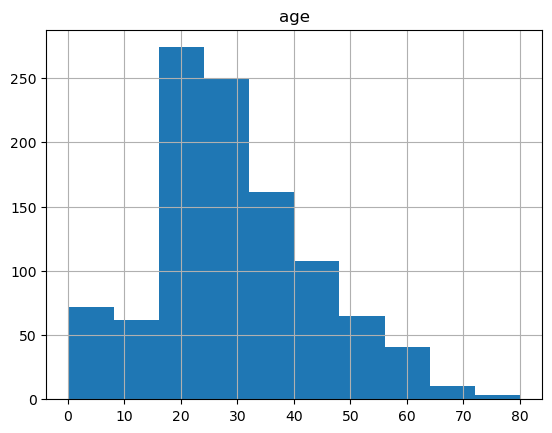

In [94]:
histogram = titanic.hist() #Dasha Davis

## Dasha Davis